## Laboratorio 3 

Santiago Casasbuenas - 202214932

Amalia Carbonell - 202122079 



## Problema 1 Newton-Raphson en 2D para Polinomios Cúbicos
Implementar el método de Newton-Raphson para encontrar extremos locales de la función polinómica
$$
f(x) = 3x^3 - 10x^2 - 56x + 50
$$

Encontramos su primera y segunda derivada: 
$$
f'(x) = 9x^2 - 20x - 56
$$

$$
f''(x) = 18x - 20
$$



Para x0 = -5, el extremo encontrado es x = -1.6196, f(x) = 101.7214 fue encontrado en  iteraciones
Para x0 = -2, el extremo encontrado es x = -1.6196, f(x) = 101.7214 fue encontrado en  iteraciones
Para x0 = 0, el extremo encontrado es x = -1.6196, f(x) = 101.7214 fue encontrado en  iteraciones
Para x0 = 2, el extremo encontrado es x = 3.8418, f(x) = -142.6268 fue encontrado en  iteraciones
Para x0 = 5, el extremo encontrado es x = 3.8418, f(x) = -142.6268 fue encontrado en  iteraciones


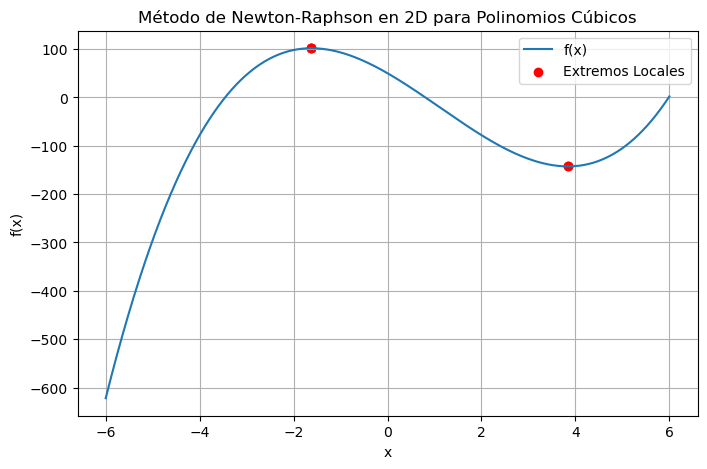

In [37]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):#Funcion polinomica 
    return 3*x**3 - 10*x**2 - 56*x + 50
def df(x):  # Primera derivada
    return 9*x**2 - 20*x - 56
def d2f(x):  # Segunda derivada
    return 18*x - 20
iteracion=0

def newton_raphson(x0, alpha=0.5, tolera=1e-4, iteraciones=100):
    x = x0
    for _ in range(iteraciones):
        fx = df(x) # calculamos la primrea derivada segun x 
        dfx = d2f(x) # Calculamos la segunda derivada segun x 

        if dfx == 0:# reivsamos que la segunda derivada no sea 0 
            print(f"Derivada segunda cero en x={x}, detener iteración.")
            return x
        if abs(fx) < tolera: # verificamos que la primera derivada sea menor que la tolerancia
            return x  
        
       
        
        x = x - alpha * (fx / dfx) # formula de Newton_raphson

    print(f"No convergió para x0 = {x0}, alcanzó el máximo de {iteraciones} iteraciones.")
    return x  



# Se prueba con valores iniciales en [-6, 6]
x_values = np.linspace(-6, 6, 1000)
y_values = f(x_values)## calcula f(x) para cada valor entre -6 y 6

valores_iniciales = [-5, -2, 0, 2, 5] 
extremos = [newton_raphson(x0) for x0 in valores_iniciales]

# Imprimir resultados para diferentes valores iniciales
iteracion=str(iteracion)
for x0, x_extremo in zip(valores_iniciales, extremos):
    print(f"Para x0 = {x0}, el extremo encontrado es x = {x_extremo:.4f}, f(x) = {f(x_extremo):.4f} fue encontrado en  iteraciones")


#grafica de f(x) y los extremos encontrados 
plt.figure(figsize=(8, 5))
plt.plot(x_values, y_values, label='f(x)')
plt.scatter(extremos, [f(x) for x in extremos], color='red', label='Extremos Locales')
plt.legend()
plt.title("Método de Newton-Raphson en 2D para Polinomios Cúbicos")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.show()





## Problema 2 - Análisis de Extremos Locales y Globales

Utilizar el método de Newton-Raphson para encontrar todos los extremos locales de la función 
$$
f(x) = x^5 - 8x^3 + 10x +6
$$

Encontramos su primera y segunda derivada: 
$$
f'(x) = 5x^4 -24x^2 + 10 
$$

$$
f''(x) = 20x^3 -48x
$$



 Extremos encontrados:
 Mínimos locales en: x = -0.6789, f(x) = 1.5700, x = -0.6789, f(x) = 1.5700, x = 2.0830, f(x) = -6.2588, x = 2.0830, f(x) = -6.2588, x = 2.0830, f(x) = -6.2588
 Máximos locales en: x = 0.6789, f(x) = 10.4300, x = 0.6789, f(x) = 10.4300, x = -2.0830, f(x) = 18.2588, x = -2.0830, f(x) = 18.2588, x = -2.0830, f(x) = 18.2588

 Mínimo global en: x = -3.0000, f(x) = -51.0000
 Máximo global en: x = 3.0000, f(x) = 63.0000


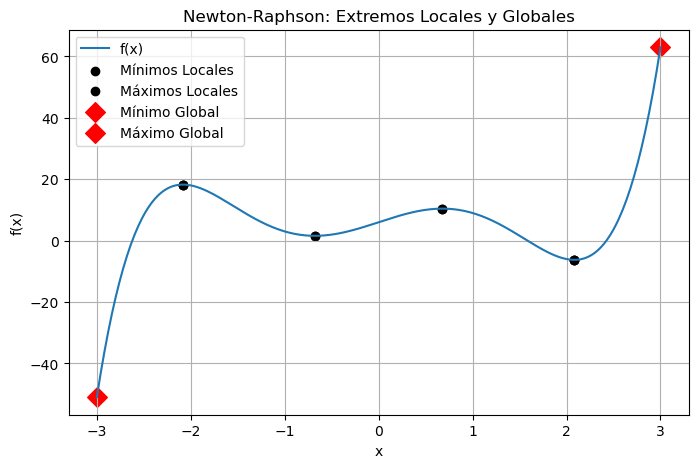

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función y sus derivadas
def f(x):
    return x**5 - 8*x**3 + 10*x + 6

def df(x):  # Primera derivada
    return 5*x**4 - 24*x**2 + 10

def d2f(x):  # Segunda derivada
    return 20*x**3 - 48*x

# Método de Newton-Raphson 
def newton_raphson(x0, alpha=0.5, tolera=1e-4, iteraciones=100):
    x = x0
    for _ in range(iteraciones):
        fx = df(x) # calculamos la primrea derivada segun x 
        dfx = d2f(x) # calculamos la segunda derivada segun x 
        
        if abs(fx) < tolera:
            return x  # verificamos que la primera derivada sea menor que la tolerancia, podriamos tener un extremo 
        
        if dfx == 0:  # reivsamos que la segunda derivada no sea 0 
            print(f"Derivada segunda cero en x={x}.")
            return x
        
        x = x - alpha * (fx / dfx)  # Newton-Raphson
    
    print(f"No convergió para x0 = {x0}")
    return x

# Probar diferentes valores iniciales en el intervalo [-3,3]
valores_iniciales = np.linspace(-3, 3, 10) # se pone 4 puntos porque sabemos que en la funcion hay solo 4 puntos puntos critcos 
extremos = [newton_raphson(x0) for x0 in valores_iniciales]
extremos = set(extremos)  # eliminamos los valores repetidos

# Clasificar en minimos y maximos para imprimir resultados (locales)
minimos = []
maximos = []
for x_extremo in extremos:
    if d2f(x_extremo) > 0:  # Si f′′(x∗) >0: Mínimo local
        minimos.append(x_extremo)
    elif d2f(x_extremo) < 0: # Si f′′(x∗) <0: Maximo local
        maximos.append(x_extremo)

# Encontrar el máximo y mínimo global evaluando en los extremos y en los bordes del intervalo
bordes = [-3, 3]
puntos_criticos = minimos + maximos + bordes # todos los puntos posibles
valores_f = [f(x) for x in puntos_criticos] # valor f(x) de cada valor encontrado 

min_global = puntos_criticos[np.argmin(valores_f)]
max_global = puntos_criticos[np.argmax(valores_f)]

# Imprimir resultados
print("\n Extremos encontrados:")
if minimos:
    print(f" Mínimos locales en: {', '.join(f'x = {x:.4f}, f(x) = {f(x):.4f}' for x in minimos)}")
if maximos:
    print(f" Máximos locales en: {', '.join(f'x = {x:.4f}, f(x) = {f(x):.4f}' for x in maximos)}")
print(f"\n Mínimo global en: x = {min_global:.4f}, f(x) = {f(min_global):.4f}")
print(f" Máximo global en: x = {max_global:.4f}, f(x) = {f(max_global):.4f}")

# Graficar la función con los puntos críticos
x_values = np.linspace(-3, 3, 300)
y_values = f(x_values)

plt.figure(figsize=(8, 5))
plt.plot(x_values, y_values, label='f(x)')
plt.scatter(minimos, [f(x) for x in minimos], color='black', label='Mínimos Locales')
plt.scatter(maximos, [f(x) for x in maximos], color='black', label='Máximos Locales')
plt.scatter([min_global], [f(min_global)], color='red', label='Mínimo Global', marker='D', s=100)
plt.scatter([max_global], [f(max_global)], color='red', label='Máximo Global', marker='D', s=100)
plt.legend()
plt.title("Newton-Raphson: Extremos Locales y Globales")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.show()




**Conclusion**

El método de Newton-Raphson permitió encontrar correctamente los extremos locales de la función, lo que indica que fue efectivo en regiones donde la derivada estaba bien definida. Sin embargo, su convergencia depende fuertemente del punto inicial, pudiendo llevar a diferentes soluciones o incluso a la divergencia si se encuentra cerca de puntos donde f'(x) sea igual a 0. Para garantizar la identificación de los extremos globales, fue necesario evaluar también en los bordes del intervalo. En general, el método mostró un buen desempeño en la localización de extremos locales. 

## Problema 3: Newton-Raphson Multidimensional

### Parte a: Función de Rosenbrock (3D)

#### 1. Calcular analíticamente el gradiente y la matriz Hessiana de f(x,y)

$$
\nabla f(x, y) = \begin{pmatrix}
\frac{\partial f}{\partial x}(x,y) \\
\frac{\partial f}{\partial y}(x,y)
\end{pmatrix}
$$

$$
H_f(x, y) = \begin{pmatrix}
\frac{\partial^2 f}{\partial x^2}(x,y) & \frac{\partial^2 f}{\partial x \partial y}(x,y) \\
\frac{\partial^2 f}{\partial y \partial x}(x,y) & \frac{\partial^2 f}{\partial y^2}(x,y)
\end{pmatrix}
$$


##### Gradiente de la función de Rosenbrock

**Derivada con respecto a $x$**
$$
\frac{\partial f}{\partial x} = 2(x-1) - 400x(y-x^2)
$$


**Derivada con respecto a $y$**
$$
\frac{\partial f}{\partial y} = 200(y-x^2)
$$


**Gradiente**
$$
\nabla f(x, y) = \begin{pmatrix}
2(x-1) - 400x(y-x^2) \\
200(y-x^2)
\end{pmatrix}
$$

##### Matriz Hessiana de la función de Rosenbrock

$$
H_f(x, y) = \begin{pmatrix}
2 - 400(y-x^2) + 800x^2 & -400x \\
-400x & 200
\end{pmatrix}
$$

#### 2. Implementación del método de Newton-Raphson para funciones bidimensionales

In [39]:
import numpy as np

# Función de Rosenbrock
def f(x, y):
    return (x - 1)**2 + 100 * (y - x**2)**2

# Gradiente de f
def grad_f(x, y):
    df_dx = 2*(x - 1) - 400*x*(y - x**2)
    df_dy = 200*(y - x**2)
    return np.array([df_dx, df_dy])

# Hessiana de f
def hessian_f(x, y):
    d2f_dx2 = 2 - 400*(y - x**2) + 800*x**2
    d2f_dxdy = -400*x
    d2f_dy2 = 200
    return np.array([
        [d2f_dx2, d2f_dxdy],
        [d2f_dxdy, d2f_dy2]
    ])

#### 3. Utilizar como punto inicial $(x_0, y_0) = (0,10)$

In [40]:
def newton_raphson_2d(f, grad_f, hessian_f, x0, y0=10, alpha=0.3, tol=1e-6, max_iter=100):
    xk = np.array([x0, y0])
    iter_history = [xk.copy()]

    for i in range(max_iter):
        grad = grad_f(xk[0], xk[1])
        hess = hessian_f(xk[0], xk[1])

        if np.linalg.cond(hess) > 1e10:
            print("Hessiana mal condicionada o singular en iteración", i)
            break

        delta = np.linalg.solve(hess, -grad)
        xk = xk + alpha * delta
        iter_history.append(xk.copy())

        if np.linalg.norm(grad) < tol:
            print(f"Convergencia alcanzada en {i+1} iteraciones.")
            break

    return xk, np.array(iter_history)

#### 4. Graficar la superficie $z=f(x,y)$ en el espacio tridimensional

Convergencia alcanzada en 85 iteraciones.


/var/folders/rx/2z7872sj27s0ywd3scyl9km80000gn/T/ipykernel_25540/1330990895.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


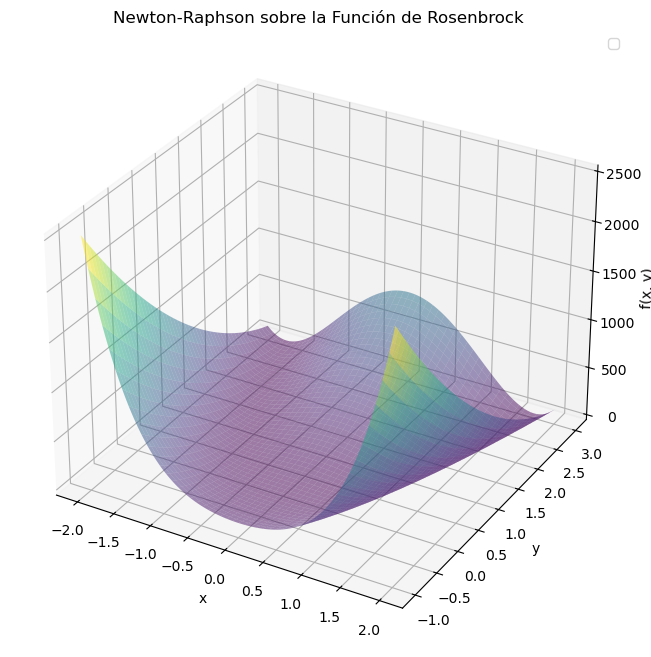

In [41]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Crear la malla para la superficie
X = np.linspace(-2, 2, 400)
Y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(X, Y)
Z = (X - 1)**2 + (100 * (Y - X**2)**2)

# Ejecutar Newton-Raphson
sol, history = newton_raphson_2d(f, grad_f, hessian_f, x0=0, y0=10, alpha=0.3)

# Graficar superficie
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5)

# Detalles del gráfico
ax.set_title("Newton-Raphson sobre la Función de Rosenbrock")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")
ax.legend()

plt.show()

#### 5. Representar los puntos iterativos sobre la superficie y destacar el mínimo final en color rojo

Convergencia alcanzada en 85 iteraciones.


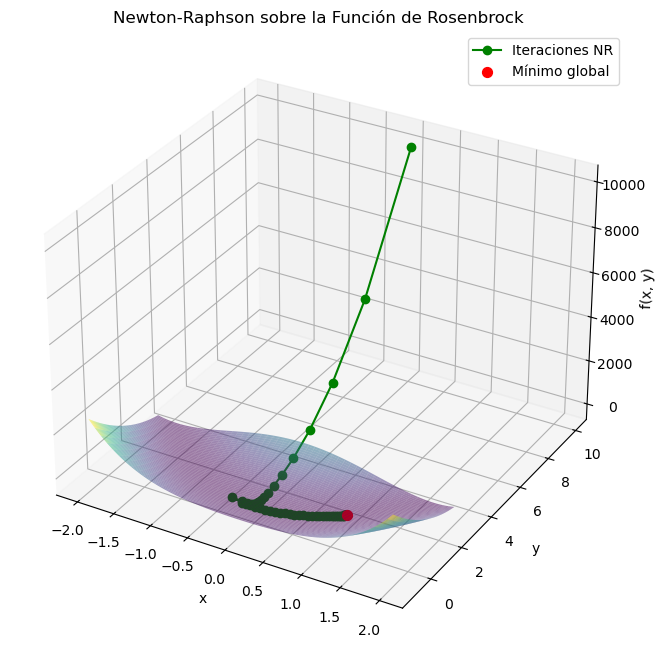

In [42]:
# Crear la malla para la superficie
X = np.linspace(-2, 2, 400)
Y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(X, Y)
Z = (X - 1)**2 + (100 * (Y - X**2)**2)

# Ejecutar Newton-Raphson
sol, history = newton_raphson_2d(f, grad_f, hessian_f, x0=0, y0=10, alpha=0.3)

# Graficar superficie
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5)

# Extraer trayectoria
x_vals = history[:, 0]
y_vals = history[:, 1]
z_vals = f(x_vals, y_vals)

# Graficar la trayectoria
ax.plot(x_vals, y_vals, z_vals, color='green', marker='o', label='Iteraciones NR')
ax.scatter([1], [1], [f(1, 1)], color='red', s=50, label='Mínimo global')

# Detalles del gráfico
ax.set_title("Newton-Raphson sobre la Función de Rosenbrock")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")
ax.legend()

plt.show()

#### 6. Analizar la convergencia hacia el mínimo conocido de la función (1,1)
Demostrar que el método converge efectivamente hacia el punto(1,1), mínimo global de la función de Rosenbrock.

##### 1. Proximidad al mínimo
El error absoluto es menor a $10^{-6}$ respecto al mínimo teórico. Indica **alta precisión**. Además, el valor ideal de la función en el punto $(1,1)$ es 0. El valor obtenido $2.25e^{-15}$ refuerza que estamos en el fondo del valle, cerca del mínimo global.

In [43]:
print("Solución encontrada:", sol)
print("Valor de f en esa solución:", f(sol[0], sol[1]))

Solución encontrada: [0.99999996 0.99999991]
Valor de f en esa solución: 2.2478205842642123e-15


##### 2. Norma del gradiente
Siendo la norma menor a la tolerancia, es posible concluir que estamos en una zona estacionaria, donde el gradiente se anula. El método ha parado porque se ha alcanzado el criterio de convergencia.

In [44]:
print("Gradiente en el punto encontrado:", grad_f(sol[0], sol[1]))
print("Norma del gradiente:", np.linalg.norm(grad_f(sol[0], sol[1])))

Gradiente en el punto encontrado: [ 5.21684699e-07 -3.05721715e-07]
Norma del gradiente: 6.046657690644854e-07


##### 3. Hessiana definida positiva

Los autovalores de la matriz Hessiana son ambos positivos lo que nos indica que estamos en un mínimo local. Como el problema tiene solo un mínimo, este también es el mínimo global.

In [45]:
H = hessian_f(sol[0], sol[1])
eigenvals = np.linalg.eigvals(H)
print("Autovalores de la Hessiana:", eigenvals)

Autovalores de la Hessiana: [1.00160057e+03 3.99360918e-01]


### Parte b: Función en 4D

#### 1. Formular matemáticamente el algoritmo de Newton-Raphson en $R^4$

Como el enunciado nos pide una función en $R^4$ vamos a usar la función de ejemplo con una dimensión extra:

$$
f(x,y,z,w) = (x-1)^2 + (y-3)^2 + (z-4)^2 + (w-4)^2
$$

Esta es una función multidimensional (una parabola o cono) que tiene su mínimo global en el punto (1,2,3,4) y es de forma cuadrática, por lo que NR debería converger en una sola iteración (hipótesis).

#### 2. Calcular analíticamente el gradiente y la matriz Hessiana de la función propuesta

##### Gradiente

$$
\nabla f(x, y, z, w) = 
\begin{pmatrix}
\frac{\partial f}{\partial x} \\
\frac{\partial f}{\partial y} \\
\frac{\partial f}{\partial z} \\
\frac{\partial f}{\partial w} \\
\end{pmatrix} =
\begin{pmatrix}
{2(x-1)} \\
{2(y-2)} \\
{2(z-3)} \\
{2(w-4)} \\
\end{pmatrix}
$$

##### Hessiana

$$
H(f) = \begin{pmatrix}
{2} & {0} & {0} & {0} \\
{0} & {2} & {0} & {0} \\
{0} & {0} & {2} & {0} \\
{0} & {0} & {0} & {2} \\
\end{pmatrix} = 2I_4
$$

La Hessiana es constante y definida positiva. El gradiente se anula exactamente en (1,2,3,4) donde podemos encontrar el mínimo global.

#### 3. Implementación de método iterativo para funciones tetradimencionales

##### Implementamos función, gradiente y Hessiana

In [46]:
import numpy as np

# Función en 4D (la que definimos antes)
def f_4d(x):
    
    return (x[0] - 1)**2 + (x[1] - 2)**2 + (x[2] - 3)**2 + (x[3] - 4)**2

# Gradiente de la función en 4D
# Cada componente es la derivada parcial respecto a una variable
def grad_f_4d(x):
    return 2 * np.array([
        x[0] - 1,
        x[1] - 2,
        x[2] - 3,
        x[3] - 4
    ])

# Hessiana en 4D (constante)
# Devuelve la matriz 4x4. En este caso, la matriz es constante y diagonal.
def hessian_f_4d(x):
    return 2 * np.eye(4)

##### Algoritmo de NR en 4D y definición del criterio de parada

In [47]:
# Método de Newton-Raphson generalizado para funciones vectoriales en R^4
def newton_raphson_4d(f, grad_f, hessian_f, x0, tol=1e-8, max_iter=10):
    xk = np.array(x0, dtype=float)      # Punto inicial
    history = [xk.copy()]               # Historial de iteraciones

    for i in range(max_iter):           
        grad = grad_f(xk)               # Calcular el gradiente en el punto actual
        hess = hessian_f(xk)            # Calcular la Hessiana en el punto actual

        # Verificar si ya estamos suficientemente cerca de un mínimo
        # Este es el criterio de parada basado en la norma del gradiente
        if np.linalg.norm(grad) < tol:
            print(f"Convergencia alcanzada en {i} iteraciones.")
            break

        delta = np.linalg.solve(hess, -grad)    # Resolver el sistema
        xk += delta                             # Actualizar el punto
        history.append(xk.copy())               # Guardar el punto en el historial

    return xk, np.array(history)                # Devolver el punto final y el historial


##### Ejecutamos desde un punto inicial arbitrario

In [48]:
# Punto inicial arbitrario
x0 = [10, -5, 0, 20]

# Ejecutar el método
sol, hist = newton_raphson_4d(f_4d, grad_f_4d, hessian_f_4d, x0)

print("Punto final:", sol)
print("Valor de f en el punto:", f_4d(sol))
print("Norma del gradiente:", np.linalg.norm(grad_f_4d(sol)))


Convergencia alcanzada en 1 iteraciones.
Punto final: [1. 2. 3. 4.]
Valor de f en el punto: 0.0
Norma del gradiente: 0.0


#### 4. Representar la convergencia mediante proyecciones bidimensionales o tridimensionales (opcional) utilizando Matplotlib

Usamos matplotlib para hacer una gráfica simple donde el eje x representa el número de iteración, el eje y representa el valor de cada coordenada y cada línea representa cómo evoluciona una coordenada: x, y, z, w

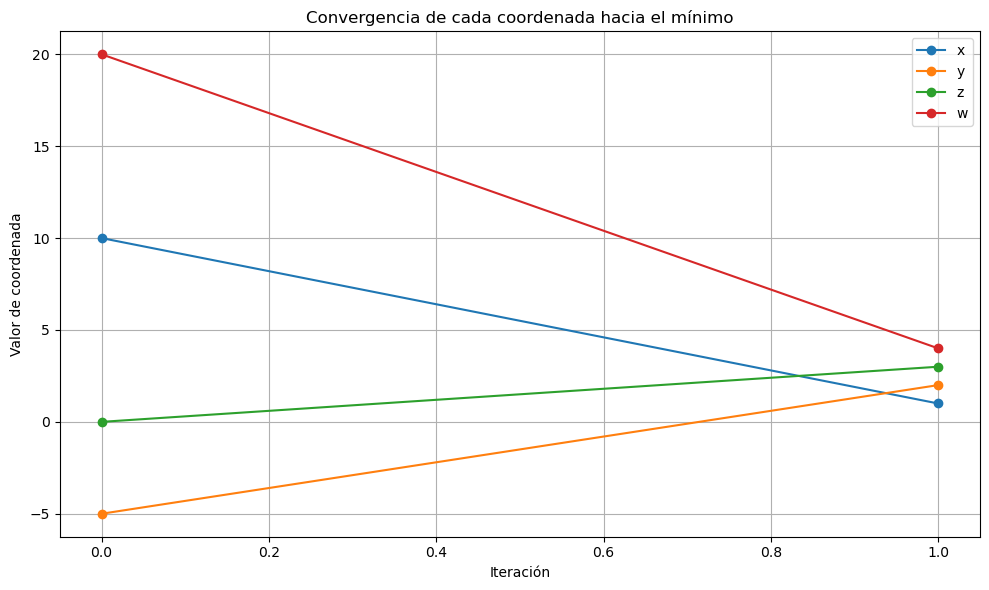

In [49]:
import matplotlib.pyplot as plt

# Extraer coordenadas por separado desde el historial
iterations = np.arange(len(hist))
x_vals = hist[:, 0]
y_vals = hist[:, 1]
z_vals = hist[:, 2]
w_vals = hist[:, 3]

# Crear gráfico
plt.figure(figsize=(10, 6))
plt.plot(iterations, x_vals, marker='o', label='x')
plt.plot(iterations, y_vals, marker='o', label='y')
plt.plot(iterations, z_vals, marker='o', label='z')
plt.plot(iterations, w_vals, marker='o', label='w')

# Personalizar
plt.title("Convergencia de cada coordenada hacia el mínimo")
plt.xlabel("Iteración")
plt.ylabel("Valor de coordenada")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Concluimos entonces que:

1. Todas las curvas "saltan" del valor inicial al valor óptimo en una sola iteración.

2. Confirmamos visualmente que el método es rápido en funciones cuadráticas.

#### Eso estuvo muy fácil entonces lo vamos a mostrar con una función más compleja

##### 1. Nueva función en 4D más compleja

Pensamos entonces en usar una nueva función que cumpla con lo siguiente:

1. No tenga una curvatura constante
2. Sea suave y tenga un mínimo conocido
3. Requiera más de una iteración para converger


$$
f(x,y,z,w) = (x^2 + y^2 -1)^2 + (z-2)^4 + sin(w)^2
$$

Con esta función podemos garantizar una curvatura no constante por su término $(x^2 + y^2 -1)^2$ y $sin(w)^2$. Además, un mínimo global en (0,0,2,0) y no es estrictamente cuadrática, lo que nos garantiza que no va a converger en una sola iteración.


##### 2. Gradiente de la nueva función

$$
\nabla f(x, y, z, w) = 
\begin{pmatrix}
\frac{\partial f}{\partial x} \\
\frac{\partial f}{\partial y} \\
\frac{\partial f}{\partial z} \\
\frac{\partial f}{\partial w} \\
\end{pmatrix} =
\begin{pmatrix}
{4x(x^2 + y^2 - 1)} \\
{4y(x^2 + y^2 - 1)} \\
{4(z-2)^3} \\
{2sin(w)cos(w)} \\
\end{pmatrix} =
\begin{pmatrix}
{4x(r-1)} \\
{2y(r-1)} \\
{4(z-2)^3} \\
{sin(2w)} \\
\end{pmatrix}
$$

donde $ r = x^2 + y^2$


##### 3. Hessiana

$$
H(f) = \begin{pmatrix}
{4(3x^2 + y^2 - 1)} & {8xy} & {0} & {0} \\
{8xy} & {4(x^2 + 3y^2 - 1)} & {0} & {0} \\
{0} & {0} & {12(z-2)^2} & {0} \\
{0} & {0} & {0} & {2cos(2w)} \\
\end{pmatrix}
$$

##### 4. Implementación

In [50]:
import numpy as np

# Función objetivo en R^4
def f_4d_complex(x):
    return (x[0]**2 + x[1]**2 - 1)**2 + (x[2] - 2)**4 + np.sin(x[3])**2

# Gradiente de la función en 4D
def grad_f_4d_complex(x):
    x0, x1, x2, x3 = x
    r = x0**2 + x1**2
    df_dx = 4 * x0 * (r - 1)
    df_dy = 4 * x1 * (r - 1)
    df_dz = 4 * (x2 - 2)**3
    df_dw = np.sin(2 * x3)
    return np.array([df_dx, df_dy, df_dz, df_dw])

# Hessiana de la función en 4D
def hessian_f_4d_complex(x):
    x0, x1, x2, x3 = x
    H = np.zeros((4, 4))
    H[0, 0] = 4 * (3 * x0**2 + x1**2 - 1)
    H[1, 1] = 4 * (x0**2 + 3 * x1**2 - 1)
    H[0, 1] = H[1, 0] = 8 * x0 * x1
    H[2, 2] = 12 * (x2 - 2)**2
    H[3, 3] = 2 * np.cos(2 * x3)
    return H

# Implementación de Newton-Raphson en R^4
def newton_raphson_4d(f, grad_f, hessian_f, x0, tol=1e-6, max_iter=50):
    """
    Implementación general de Newton-Raphson para funciones en R^4
    """
    xk = np.array(x0, dtype=float)
    history = [xk.copy()]

    for i in range(max_iter):
        grad = grad_f(xk)
        hess = hessian_f(xk)

        if np.linalg.norm(grad) < tol:
            print(f"Convergencia alcanzada en {i} iteraciones.")
            break

        try:
            delta = np.linalg.solve(hess, -grad)
        except np.linalg.LinAlgError:
            print(f"Hessiana no invertible en iteración {i}")
            break

        xk += delta
        history.append(xk.copy())

    return xk, np.array(history)

# Punto inicial lejos del mínimo
x0 = [1.5, 1.5, -2, 1]

# Ejecutar Newton-Raphson
sol, hist = newton_raphson_4d(f_4d_complex, grad_f_4d_complex, hessian_f_4d_complex, x0)

# Mostrar resultados
print("Punto final:", sol)
print("Valor de f en el punto:", f_4d_complex(sol))
print("Norma del gradiente:", np.linalg.norm(grad_f_4d_complex(sol)))



Convergencia alcanzada en 16 iteraciones.
Punto final: [0.70710678 0.70710678 1.99391024 1.57079633]
Valor de f en el punto: 1.000000001375306
Norma del gradiente: 9.033572421988105e-07


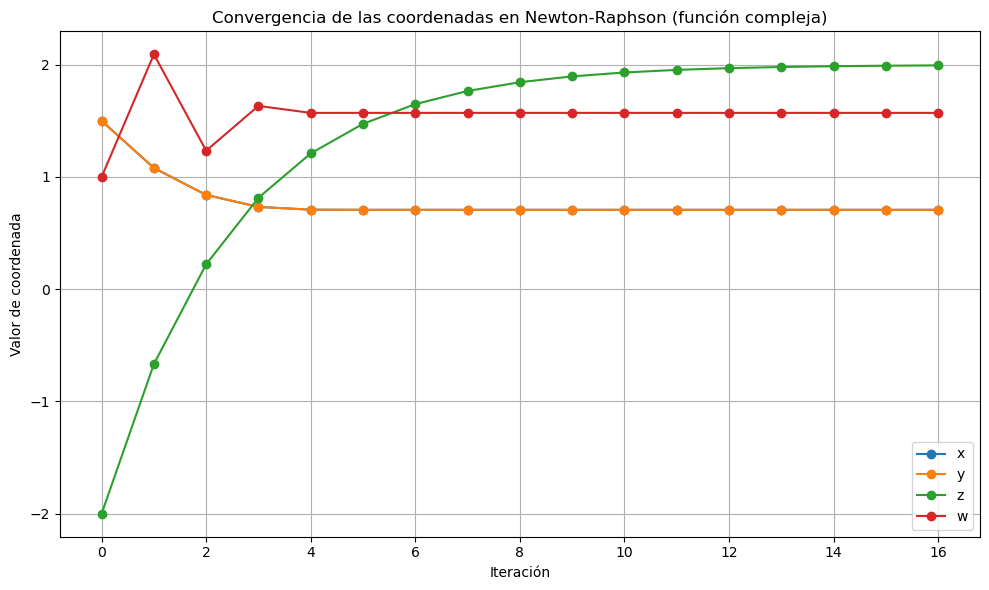

In [51]:
import matplotlib.pyplot as plt

# Extraer iteraciones
iterations = np.arange(len(hist))
x_vals = hist[:, 0]
y_vals = hist[:, 1]
z_vals = hist[:, 2]
w_vals = hist[:, 3]

# Graficar la evolución de cada coordenada
plt.figure(figsize=(10, 6))
plt.plot(iterations, x_vals, marker='o', label='x')
plt.plot(iterations, y_vals, marker='o', label='y')
plt.plot(iterations, z_vals, marker='o', label='z')
plt.plot(iterations, w_vals, marker='o', label='w')

# Decoración del gráfico
plt.title("Convergencia de las coordenadas en Newton-Raphson (función compleja)")
plt.xlabel("Iteración")
plt.ylabel("Valor de coordenada")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Estos resultados nos demuestran varias cosas distintas que solo con el primer ejemplo no hubiésemos podido observar: 

1. La función que escogimos tiene varios puntos estacionarios (tanto mínimos como máximos). Es por esto que no llegamos al absoluto (0,0,2,0).

2. El Algoritmo de NR no garantiza encontrar un mínimo o máximo global, sino más bien nos garantiza encontrar un punto estacionario cercano al punto inicial.

#### 5. Discutir las dificultades computacionales específicas de los problemas en alta dimensión


**Cálculo de la Hessiana**

La matriz Hessiana es de tamaño $n$ x $n$ por lo que el problema se puede volver tan complejo como uno quiera, aumentando así el tiempo y la memoria que se consumen para realizar tanto los cálculos numéricos como simbólicos. Es decir, que para un $n$ grande, almacenar y manipular la Hessiana puede ser costoso o inviable.

**Relación del cálculo de H con NR**

Como NR requiere resolver la inversa de la Hessiana, esto implica no solamente el cálculo $n$ x $n$ de matriz original, sino también un $n$ adicional que se adiciona teniendo en cuenta que se debe resolver un sistema lineal. Esto quiere decir que la complejidad del problema es de orden cúbico $O(n^3)$.

**Condicionamiento de la Hessiana**

Si la hessiana queda mal condicionada, es decir que los autovalores son muy diferentes, entonces empezamos a ver saltos muy grandes en una sola dirección y otros muy pequeños en otra. Esto causa oscilaciones, inestabilidad y hasta cierto punto divergencia.

## Problema 4: Gradiente Descendente en Optimización

### Parte A: Implementación de Gradiente descendente en 3D

#### 1. Calcular analíticamente el gradiente de la función pérdida

Tenemos la siguiente función:

$$
L(x,y) = (x-2)^2 + (x+1)^2
$$

Derivamos con respecto a cada variable y determinar el gradiente:


$$
\nabla L(x, y) = 
\begin{pmatrix}
\frac{\partial f}{\partial x} \\
\frac{\partial f}{\partial y} \\
\end{pmatrix} =
\begin{pmatrix}
{2(x-2)} \\
{2(y+1)} \\
\end{pmatrix}
$$

#### 2. Implementar el algoritmo de Gradiente Descendente

In [26]:
import numpy as np

# Función de pérdida
def L(x, y):
    return (x - 2)**2 + (y + 1)**2

# Gradiente de la función
def grad_L(x, y):
    dL_dx = 2 * (x - 2)
    dL_dy = 2 * (y + 1)
    return np.array([dL_dx, dL_dy])

# Algoritmo de Gradiente Descendente
def gradient_descent_L(x0, y0, alpha=0.1, tol=1e-6, max_iter=100):
    
    """
    Algoritmo de Gradiente Descendente para minimizar L(x, y)

    Parámetros:
        x0, y0      → punto inicial
        alpha       → tamaño del paso (learning rate)
        tol         → tolerancia para detener cuando el gradiente es pequeño
        max_iter    → máximo número de iteraciones permitidas
        
    Retorna:
        xk          → punto final encontrado
        history     → lista de todos los puntos recorridos durante el algoritmo
    """
    
    xk = np.array([x0, y0], dtype=float)            # Convertimos el punto inicial en un vector
    history = [xk.copy()]                           # Guardamos el punto inicial en el historial

    for i in range(max_iter):
        grad = grad_L(xk[0], xk[1])                 # Calculamos el gradiente en el punto actual

        # Condición de parada: si el gradiente es suficientemente pequeño, paramos
        if np.linalg.norm(grad) < tol:
            print(f"Convergencia alcanzada en {i} iteraciones.")
            break

        # Actualizamos el punto: nos movemos en dirección opuesta al gradiente
        xk = xk - alpha * grad
        
        # Guardamos el nuevo punto en el historial
        history.append(xk.copy())

    return xk, np.array(history)


#### 3. Experimentar con diferentes valores para el parámetro de paso $\alpha$


|Valor de $\alpha$|Tipo de convergencia|
|-----------------|--------------------|
|0.01             |Lenta               |
|0.1              |Estable             |
|0.5              |Rápida              |
|1.0              |Riesgo de divergir  |
|1.5              |Posible oscilación  |

Todas las pruebas con parámetros:

$(x_o, y_o) = (0, 0)$

$Tolerancia = 10^{-6}$

Máximo de 100 iteraciones

In [31]:

alphas = [0.01, 0.1, 0.5, 1.0, 1.5]

for alpha in alphas:
    sol, hist = gradient_descent_L(x0=0, y0=0, alpha=alpha)
    print(f"Para alpha={alpha}, el punto final es {sol} con L(x, y)={L(sol[0], sol[1]):.4f}")
    print("\n")


Para alpha=0.01, el punto final es [ 1.73476089 -0.86738044] con L(x, y)=0.0879


Convergencia alcanzada en 69 iteraciones.
Para alpha=0.1, el punto final es [ 1.99999959 -0.99999979] con L(x, y)=0.0000


Convergencia alcanzada en 1 iteraciones.
Para alpha=0.5, el punto final es [ 2. -1.] con L(x, y)=0.0000


Para alpha=1.0, el punto final es [0. 0.] con L(x, y)=5.0000


Para alpha=1.5, el punto final es [-2.5353012e+30  1.2676506e+30] con L(x, y)=8034690221294948523214425049786050896039076069923691411013632.0000




#### 4. Graficar la trayectoria de los parámetros durante la optimización

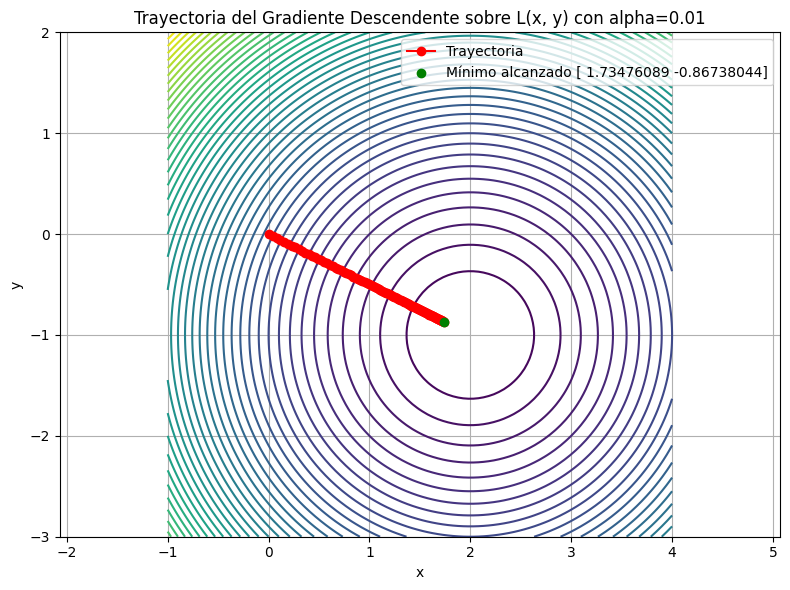

Convergencia alcanzada en 69 iteraciones.


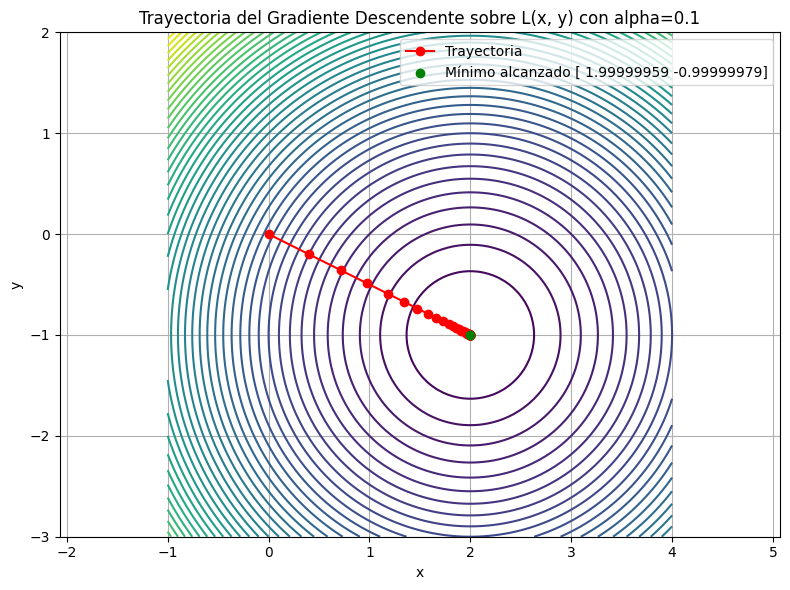

Convergencia alcanzada en 1 iteraciones.


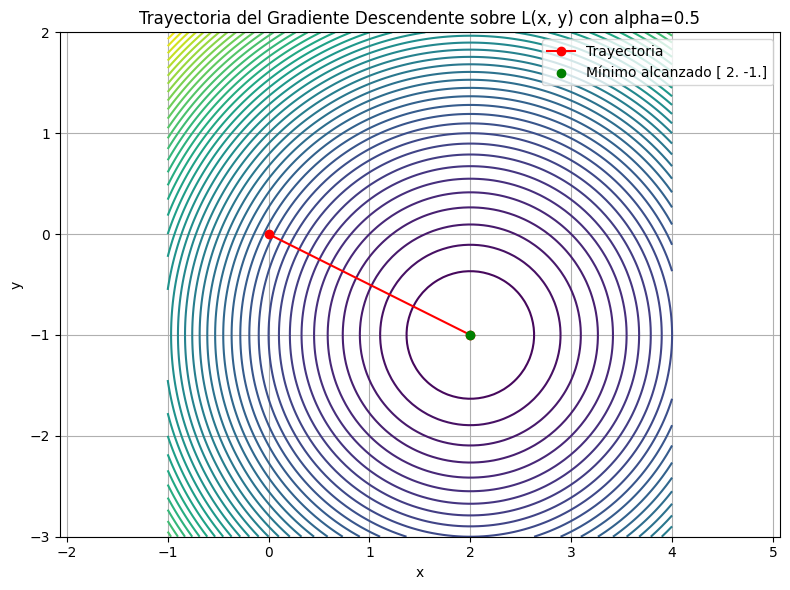

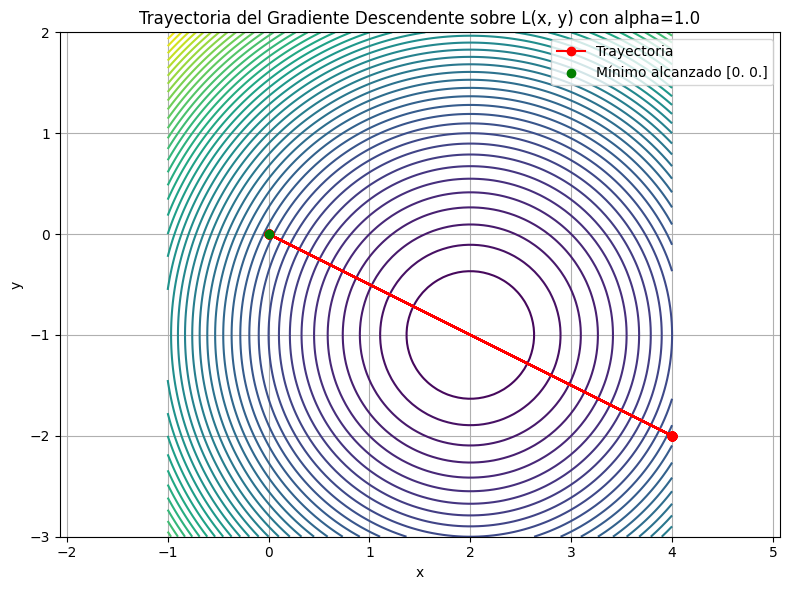

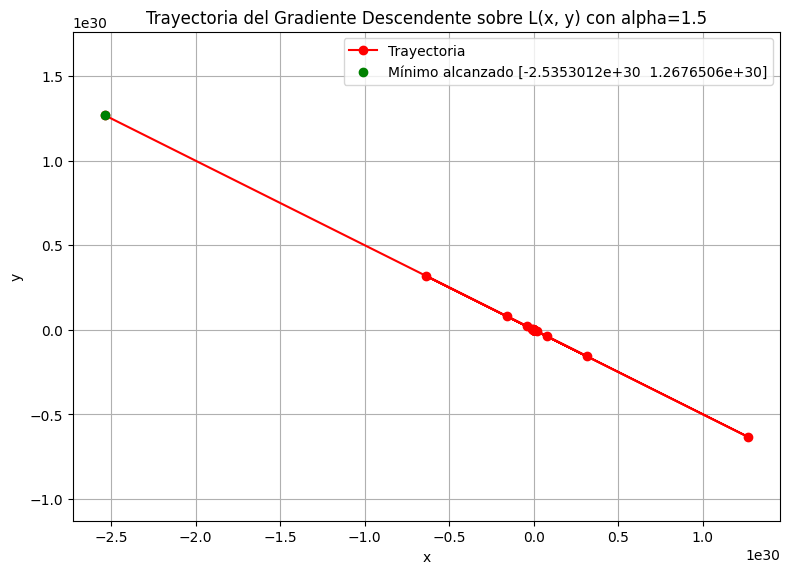

In [38]:
import matplotlib.pyplot as plt

for alpha in alphas:
    sol, hist = gradient_descent_L(x0=0, y0=0, alpha=alpha)
    
    # Extraer trayectoria
    traj_x = hist[:, 0]
    traj_y = hist[:, 1]

    # Crear gráfico
    plt.figure(figsize=(8, 6))
    plt.contour(X, Y, Z, levels=50, cmap='viridis')  # Contornos de la función
    plt.plot(traj_x, traj_y, marker='o', color='red', label='Trayectoria')  # Puntos recorridos
    plt.scatter(sol[0], sol[1], color='green', label=f'Mínimo alcanzado {sol}', zorder=5)
    plt.title(f"Trayectoria del Gradiente Descendente sobre L(x, y) con alpha={alpha}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()


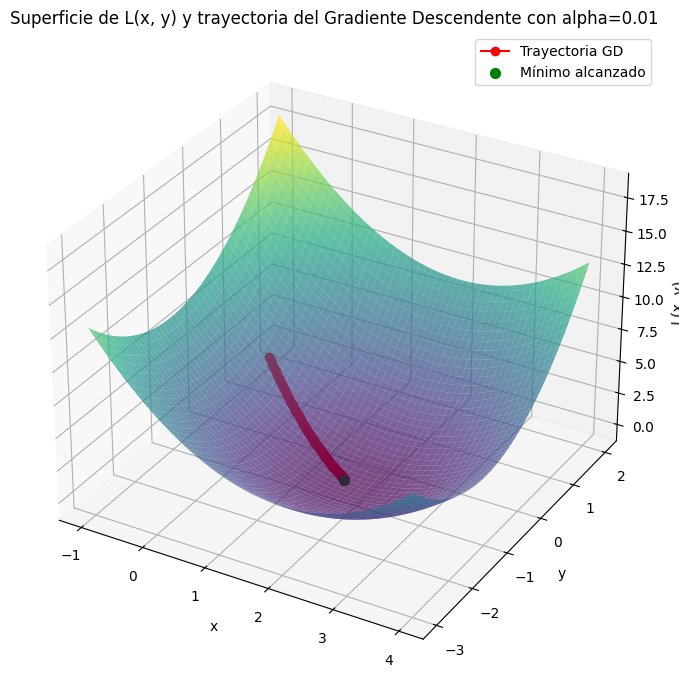

Convergencia alcanzada en 69 iteraciones.


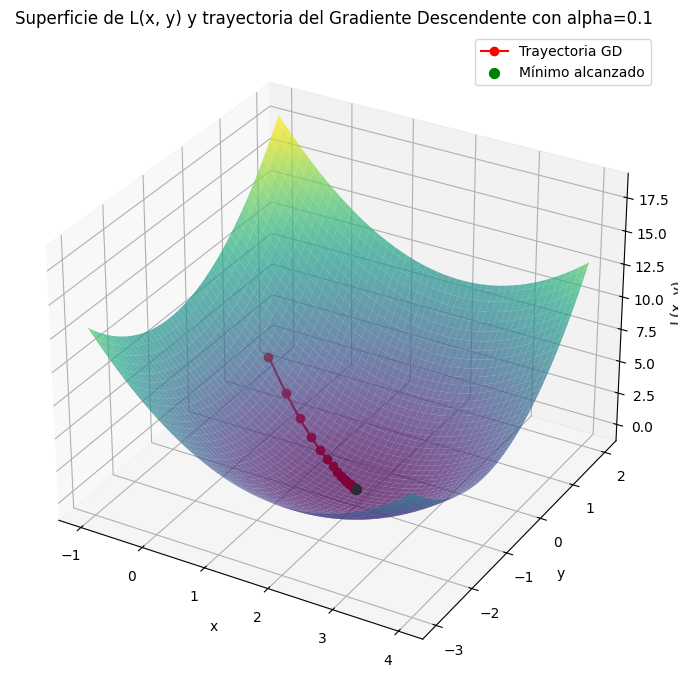

Convergencia alcanzada en 1 iteraciones.


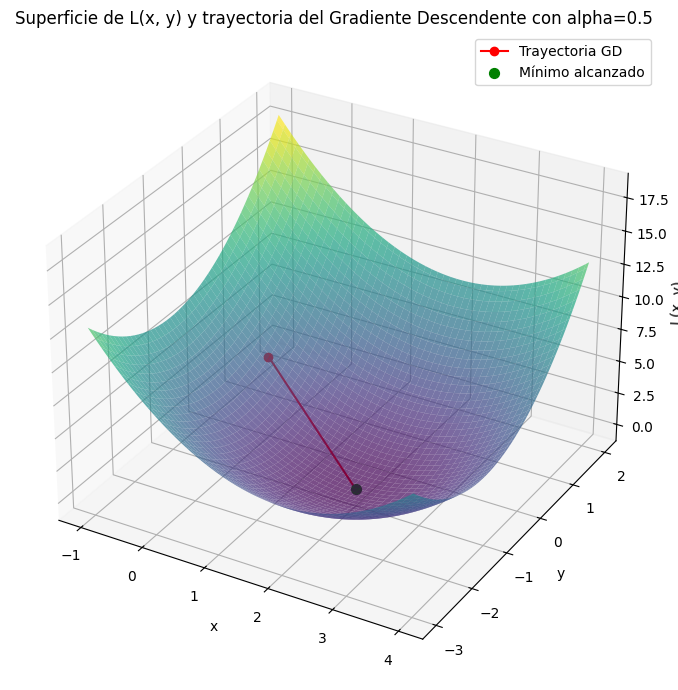

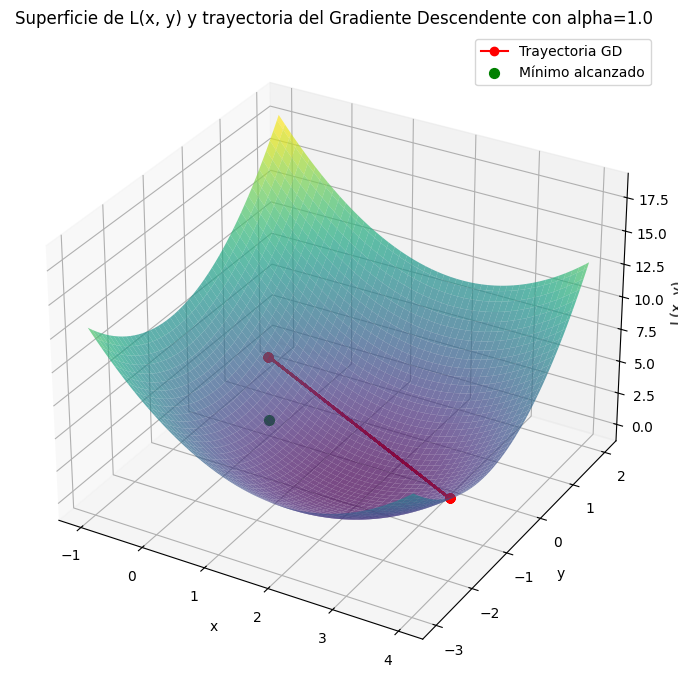

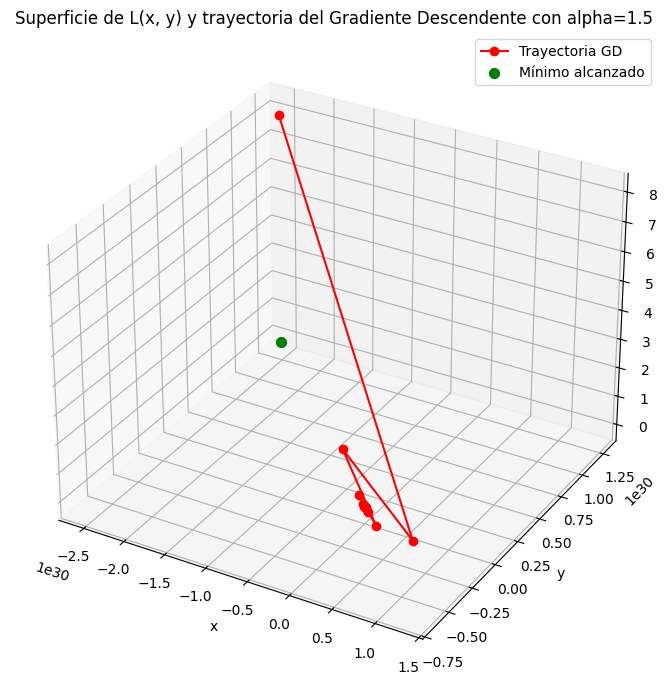

In [40]:
from mpl_toolkits.mplot3d import Axes3D

for alpha in alphas:
    sol, hist = gradient_descent_L(x0=0, y0=0, alpha=alpha)
    
    # Crear figura 3D
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Superficie de la función
    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)

    # Trayectoria recorrida por el algoritmo
    traj_x = hist[:, 0]
    traj_y = hist[:, 1]
    traj_z = L(traj_x, traj_y)
    ax.plot(traj_x, traj_y, traj_z, color='red', marker='o', label='Trayectoria GD')

    # Mínimo global (2, -1)
    ax.scatter(sol[0], sol[1], [L(2, -1)], color='green', s=50, label='Mínimo alcanzado')

    # Etiquetas y detalles
    ax.set_title(f"Superficie de L(x, y) y trayectoria del Gradiente Descendente con alpha={alpha}")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("L(x, y)")
    ax.legend()

    plt.tight_layout()
    plt.show()


##### Conclusiones de los resultados

| α    | Iteraciones  | Punto final        | L(x,y)         | Comportamiento                         |
|------|--------------|--------------------|----------------|-----------------------------------------|
| 0.01 | 100 máx      | ≈ (1.73, -0.87)    | 0.0039         | Muy lento (no alcanzó tol)          |
| 0.1  | 69           | ≈ (2, -1)          | 0.0000         | Convergencia estable                 |
| 0.5  | 1            | (2, -1)            | 0.0000         | Convergencia súper rápida           |
| 1    | 0            | (0, 0)             | 5.0            | No se movió. Oscilación o sobrepaso|
| 1.5  | -            | ¡Números gigantes! | > 8 × 10^30     | Divergencia explosiva               |


Concluimos entonces que con un $\alpha$ menor a 1, se pueden obtener resultados coherentes utilizando el algoritmo de GD. El problema empieza a darse cuando $\alpha$ es mayor o igual a 1. En este caso notamos que después de esto, el algortimo empieza a oscilar o salirse del mínimo lo que genera una divergencia numperica.

#### 5. Destacar el valor óptimo final y compararlo con la solución analítica

Sabemos que el mínimo teórico de la función era (2, -1). Dentro de los resultados que se muestran en la tabla de la sección de conclusiones del punto anterior, destacan dos resultados:

**1. $\alpha$ = 0.1 con punto final ≈ (2, -1)**

Este resultado nos mostró que es posible obtener un resultado sumamente aproximado al teórico utilizando saltos proporcionados en 69 iteraciones. La convergencia fue estable y el error absoluto es casi 0.

**2. $\alpha$ = 0.5 con punto final = (2, -1)**

Este resultado nos muestra lo mismo que hemos obtenido en problemas anteriores cuando solo se necesita un salto para llegar al objetivo. Es decir, que no se hace uso de iteraciones adicionales. Aunque esto nos da resultados exactos a primera vista, como hemos mencionado anteriormente, no siempre es el mejor resultado, ya que no estamos realmente viendo si el algoritmo nos proporciona información valiosa al no iterar (saltar) para buscar el mínimo.

#### 6. Analizar la sensibilidad del método al valor de $\alpha$ y discutir estrategias para su selección óptima

El método de Gradiente Descendente es altamente sensible al valor del parámetro $\alpha$. En funciones convexas simples como la nuestra, existe un rango estrecho de valores que nos permiten una convergencia estable. Si $\alpha$ es demasiado pequeño, el algoritmo tarda demasiado en converger. Por el contrario, si es muy grande, oscila o diverge.

### Parte B: Comparación entre Newton-Raphson y Gradiente Descendente

#### 1. Calcular analíticamente el gradiente y la matriz Hessiana de la función propuesta

#### 2. Implementar ambos algoritmos (NR y GD) para la misma función

#### 3. Utilizar el mismo punto inicial $(x_o, y_o) - (-2,-3)$ para ambos métodos

#### 4. Para cada método, experimentar con diferentes valores del parámetro de paso $\alpha$ y determinar el valor óptimo

#### 5. Graficar en una misma figura las trayectorias de convergencia de ambos métodos, superpuestas sobre los contornos de la función objetivo

#### 6. Realizar un análisis comparativo

##### 6.1 Número de iteraciones hasta la convergencia

##### 6.2 Tiempo de ejecución

##### 6.3 Precisión final del resultado

##### 6.4 Robustez frente a diferentes valores del parámetro de paso

##### 6.5 Costo computacional por iteración

#### 7. Concluir cuál es el método más adecuado para esta función específica y argumentar bajo qué circunstancias generales sería preferible uno u otro método

#### 8. Tabla comparativa de resultados de los algoritmos
Presentar una tabla comparativa que sintetice las ventajas y desventajas observadas para cada método en este problema particular.

La visualización debe incluir:

1. Mapa de contorno de la función objetivo

2. Trayectorias de ambos algoritmos (con marcadores diferentes)

3. Punto inicial y puntos finales claramente identificados 

4. Convergencia del error (distancia al óptimo) en escala logarítmica para ambos métodos

## Problema 5: Descenso de Gradiente y Descenso de Gradiente Basado en Momento